# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [122]:
# Dependencies and Setup
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import requests
# import time
# from scipy.stats import linregress
# import citypy

# Workaround to fix Citipy issue.  Performed a pip install citipy and still would not work with original code.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st
from pandas import DataFrame
from requests import get 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file_cities = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (0, 90)
lng_range = (-180, 180)

## Generate Cities List

In [108]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [109]:
# Use url from class, ensure API Key is working, and convert temps to imperial (Fahrenheit)
url = 'http://api.openweathermap.org/data/2.5/weather?&units=imperial&'  # To convert to Fahrenheit, I needed to have a workaround where I placed the & after imperial.  Otherwise, the temps are not converted correctly
#url = 'http://api.openweathermap.org/data/2.5/weather?'
#units = 'imperial'
api_key = '28c4ccd34ec2c4e49331c9c55008fd8b'   # My API key

# Test url to determine it works
#http://api.openweathermap.org/data/2.5/weather?&APPID=28c4ccd34ec2c4e49331c9c55008fd8b&units=imperial&q=chicago

# Create query_url
#query_url = url + "&appid=" + api_key + "&units=" + units + "&q=" + city

query_url = url + "appid=" + api_key + "&q=" + city
#print(query_url)

#type(query_url)  # Check type 

In [110]:
# Set up a test of cities in list to iterate in the For Loop
#cities = ['London', 'notA_city', 'Chicago', 'Tokyo', 'Toronto', 'Orlando', 'Miami', 'Moscow', 'Hong Kong', 'Shanghai', 'Seoul', 'Paris', 'New York City']

# Initiate a list (columns) to hold reponses in a df
temp = []
humidity = []
cloudiness = []
wind_speed = []
lngs = []
lats = []
city_name = []

In [124]:
# Use a For Loop to iterate through cities

for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&q=" + city
        weather_dict = get(query_url).json()     
        if 'coord' in weather_dict:
            print('found', city)
        else:
            print(city, 'not found')
        lats.append(weather_dict['coord']['lat'])  # Append to list for each key/item found in weather_dict
        lngs.append(weather_dict['coord']['lon'])
        humidity.append(weather_dict['main']['humidity'])
        cloudiness.append(weather_dict['clouds']['all'])
        wind_speed.append(weather_dict['wind']['speed'])
        temp.append(weather_dict['main']['temp'])
        city_name.append(city)
    except Exception as e:
        print('Something broke...', e)
    finally:
        print('Finished trying to get', city)

city_name.to_csv("./output/cities.csv", index=False)


found invermere
Finished trying to get invermere
found karasjok
Finished trying to get karasjok
found naze
Finished trying to get naze
found butaritari
Finished trying to get butaritari
found klaksvik
Finished trying to get klaksvik
found la macarena
Finished trying to get la macarena
belushya guba not found
Something broke... 'coord'
Finished trying to get belushya guba
found marawi
Finished trying to get marawi
found hibbing
Finished trying to get hibbing
found wageningen
Finished trying to get wageningen
found pierre
Finished trying to get pierre
found yellowknife
Finished trying to get yellowknife
found gushikawa
Finished trying to get gushikawa
illoqqortoormiut not found
Something broke... 'coord'
Finished trying to get illoqqortoormiut
found alihe
Finished trying to get alihe
found olga
Finished trying to get olga
found cherskiy
Finished trying to get cherskiy
found baykit
Finished trying to get baykit
found thinadhoo
Finished trying to get thinadhoo
found shumskiy
Finished tryin

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [112]:
# Set up a df by using dict. They are defined in the list above.
weather_df = DataFrame({
    'City_Name': city_name,
    'Temp': temp,
    'Latitude': lats,
    'Longitude': lngs,
    'Humidity': humidity,
    'Wind_Speed': wind_speed,
    'Cloudiness': cloudiness,
})

In [113]:
weather_df
# type(weather_df)  # Check it is a df of type

,City_Name,Temp,Latitude,Longitude,Humidity,Wind_Speed,Cloudiness
0,invermere,68.85,50.5167,-116.0354,41,1.99,82
1,karasjok,46.51,69.4719,25.5112,63,12.26,100
2,naze,71.33,28.3667,129.4833,75,18.59,54
3,butaritari,82.89,3.0707,172.7902,76,16.31,27
4,klaksvik,54.52,62.2266,-6.5890,97,13.02,90
...,...,...,...,...,...,...,...
63,kutum,86.81,14.2000,24.6667,24,15.08,61
64,llangefni,68.00,53.2556,-4.3106,49,1.25,94
65,sitka,57.09,57.0531,-135.3300,72,6.91,90
66,teya,49.68,60.3778,92.6267,65,6.33,99


In [126]:
# Export the city data into a .csv file in the output folder
weather_df.to_csv("./output/weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [115]:
#  Get the indices of cities that have humidity over 100%.


In [116]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

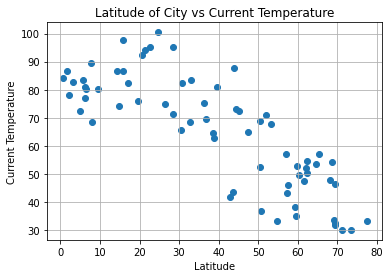

In [127]:
plt.scatter(weather_df['Latitude'], weather_df['Temp'])
plt.title(f"Latitude of City vs Current Temperature")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Current Temperature')
plt.savefig("./output/lat_vs_temp.png", bbox_inches="tight")
plt.show()

# Analysis:  There is a direct correlation of temperature relative to the equator (Latitude = 0).  
# The closer the city is to the equator, the higher the temperature. 

## Latitude vs. Humidity Plot

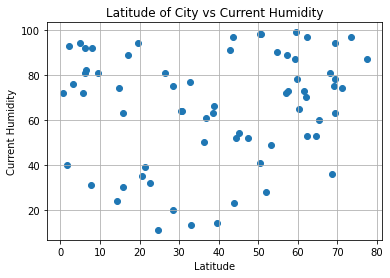

In [128]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.title(f"Latitude of City vs Current Humidity")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Current Humidity')
plt.savefig("./output/lat_vs_humidity.png", bbox_inches="tight")
plt.show()

# Analysis:  In analyzing humidity relative to latitude, it is fairly distributed.  
# That means high humidity can be found in cities near or far from the equator (Latitude = 0).

## Latitude vs. Cloudiness Plot

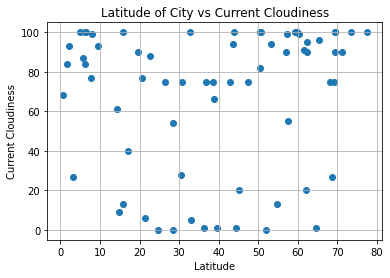

In [129]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'])
plt.title(f"Latitude of City vs Current Cloudiness")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Current Cloudiness')
plt.savefig("./output/lat_vs_cloud.png", bbox_inches="tight")
plt.show()

# Analysis:  In the analysis of cloudiness relative to latitude, it is distributed.  
# That means cloudiness found in cities is not related to the distance of the cities to equator (Latitude = 0).

## Latitude vs. Wind Speed Plot

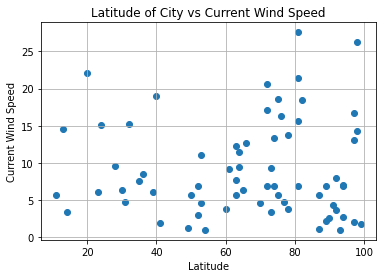

In [130]:
plt.scatter(weather_df['Humidity'], weather_df['Wind_Speed'])
plt.title(f"Latitude of City vs Current Wind Speed")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Current Wind Speed')
plt.savefig("./output/lat_vs_wind.png", bbox_inches="tight")
plt.show()

# Analysis:  In the analysis of cloudiness relative to latitude, there appears to be a correlation of higher wind speeds 
# to the further away the city is from the equator (Latitude = 0).  

## Linear Regression

In [ ]:
# Define the criterias for Northern and Southern Hemisphere.  Use .loc method in a list.  Create new dataframes.
northern_hemp_df = weather_df.loc[weather_df['Latitude'] >= 0]
southern_hemp_df = weather_df.loc[weather_df['Latitude'] < 0]

In [ ]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemp_df['Latitude']
y_values = northern_hemp_df['Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Current Temperature - Fahrenheit", "Northern",(0, 0))
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression